In [9]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Symbols can be defined as follows:

In [10]:
x = smp.symbols('x')

You can then use various mathematical operators on the defined symbols

In [11]:
x**2

x**2

In [12]:
smp.sin(x)

sin(x)

There are many many functions built into sympy

In [13]:
smp.

SyntaxError: invalid syntax (1772782272.py, line 1)

Can save expressions in new variables

In [ ]:
y = x**2 + 4*x + 3
y

Do operations on the new variables:

In [ ]:
z = y**2
z

Note that it doesn't expand. There are different methods you need to call to do different things with the expression:

In [ ]:
z.factor()

In [ ]:
z.expand()

In the notation `smp.solve(f,x)`, sympy finds the value of $x$ that makes $f(x)=0$. 

In [14]:
smp.solve(z,x)

[-3, -1]

In [15]:
smp.solve(smp.sin(x), x)

[0, pi]

**Good Practice**: If you know that your variable $x$ is real (and in some cases non-negative) it's good to specify this when you define your variables to prevent complicated issues when solving complicated problems (especially with integrals).

In [16]:
x = smp.symbols('x')
smp.solve(x**2+1, x)

[-I, I]

In [17]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x+4, x)

[]

In [18]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x**2-1, x)

[1]

Can define many variables at once

In [19]:
x, y, z = smp.symbols('x y z')
F = x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

Can also solve multivariable expressions, specifying which variable we want to solve for. In each case, $F=0$ is being solved for

In [20]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [21]:
y_sols = smp.solve(F,y)
y_sols

[-x**2/sin(z)]

In [22]:
z_sols = smp.solve(F,z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Finally, it may be the case that one has a sympy expression but wants to convert it into a numerical function so they can plot on a computer

In [23]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [24]:
expr_f = smp.lambdify([x,y], expr)
expr_f(1,2)

3.6651914291880923

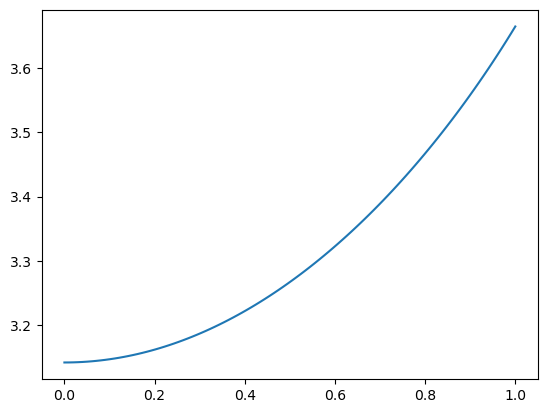

In [25]:
x_num = np.linspace(0,1,100)
y_num = 2
plt.plot(x_num, expr_f(x_num,y_num))
plt.show()

For multivariable expressions, can also substitute values in

In [26]:
F

x**2 + y*sin(z)

In [28]:
F.subs([(y,smp.cos(x)),(z,20)]) #substitutes y with cos(z) and z with y

x**2 + sin(20)*cos(x)

# Examples

A falling object encounters a moving platform accelerating upwards:

1. Object $h_o(t) = h_0 - v_o t - \frac{1}{2}gt^2$
2. Platform $h_p(t) = v_p t + \frac{1}{2}qt^2$

**Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.**

We need to solve for $v_0$ and $t$ in the two equations

1. $h_0(t) = h_p(t)$
2. $ \frac{dh_0}{dt} (t) = - \frac{dh_p}{dt}(t) $

In sympy, need to construct our system of equations as $EQ_1=0$, $EQ_2=0$, ... In our case, we rewrite them as

1. $h_0(t) - h_p(t) = 0$
2. $\frac{dh_0}{dt} + \frac{dh_p}{dt} = 0$

In [29]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

Define expressions

In [36]:
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
dh0dt = -g*t - v0
hpt = vp*t + smp.Rational(1,2)*q*t**2
dhpdt = vp + q*t

Define equations

In [37]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

Solve the equations

In [38]:
smp.solve([eq1, eq2], [t, v0])[0] #solve eq1 for t and eq2 for v0

((-v_p + v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q))/(-g + q),
 v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q))

In [39]:
t_collide, v_initfall = smp.solve([eq1, eq2], [t, v0])[0]

In [40]:
v_initfall

v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q)

In [41]:
t_collide

(-v_p + v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q))/(-g + q)

**What is the velocity when they collide?**

In [42]:
dh0dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(g*v_p - q*v_p + q*sqrt(-2*g*h_0 + 6*h_0*q + 4*v_p**2))/(-g + 3*q)

In [43]:
dhpdt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(-g*v_p + q*v_p - q*sqrt(-2*g*h_0 + 6*h_0*q + 4*v_p**2))/(-g + 3*q)

# Calculus (1st year)

Watch my video here for a more in depth discussion: https://www.youtube.com/watch?v=-SdIZHPuW9o

In [31]:
x = smp.symbols('x')

## Limits

$$\lim_{x \to \pi} \sin(x/2+ \sin(x))$$

In [32]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

## Derivatives

$$ \frac{d}{dx} \left( \frac{1+\sin x}{1 - \cos x} \right)^2 $$

In [33]:
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$\frac{d}{dx} f(x+g(x)) $$

In [48]:
f, g = smp.symbols('f g', cls=smp.Function) #f and g are abstract functions

In [49]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)

In [50]:
g

g(x)

In [51]:
f

f(x + g(x))

In [52]:
dfdx = smp.diff(f,x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [54]:
dfdx.subs([(g, smp.sin(x))]) #.doit()

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [53]:
dfdx.subs([(g, smp.sin(x))]).doit() # need to call doit

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## Basic Antiderivatives

$$ \int \csc(x) \cot (x)  dx $$

In [39]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

## Definite Integrals

$$\int_{0}^{\ln(4)}\frac{e^x dx}{\sqrt{e^{2x}+9}} $$

In [40]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$\int_1^t x^{10} e^x dx $$

In [41]:
t= smp.symbols('t')

In [42]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

# Examples

The hydrogen wave function is given by

$$\psi_{nlm} = R_{nl}(r)Y_l^m(\theta, \phi) $$

$$R_{nl}(r) =  \sqrt{\left(\frac{2}{na}\right)^3 \frac{(n-l-1)!}{2n[(n+1)!]}} e^{-r/na} \left(\frac{2r}{na}\right)^l \left[L_{n-l-1}^{2l+1}(2r/na)\right]$$

The mean distance from the nucleus of the electron:

$$\left<r\right> = \int R_{nl}^2 r^3 dr$$

The standard deviation in the distance from the nucleus of the electron:

$$\sigma = \sqrt{\left<r^2\right> - \left<r\right>^2} =  \sqrt{\left(\int_{0}^{\infty}R_{nl}^2 r^4 dr\right) - \left(\int_{0}^{\infty} R_{nl}^2 r^3 dr\right)^2}$$

In [55]:
from sympy import assoc_laguerre

In [56]:
assoc_laguerre?

Init signature: assoc_laguerre(n, alpha, x)
Docstring:     
Returns the $n$th generalized Laguerre polynomial in $x$, $L_n(x)$.

Examples

>>> from sympy import assoc_laguerre, diff
>>> from sympy.abc import x, n, a
>>> assoc_laguerre(0, a, x)
1
>>> assoc_laguerre(1, a, x)
a - x + 1
>>> assoc_laguerre(2, a, x)
a**2/2 + 3*a/2 + x**2/2 + x*(-a - 2) + 1
>>> assoc_laguerre(3, a, x)
a**3/6 + a**2 + 11*a/6 - x**3/6 + x**2*(a/2 + 3/2) +
    x*(-a**2/2 - 5*a/2 - 3) + 1

>>> assoc_laguerre(n, a, 0)
binomial(a + n, a)

>>> assoc_laguerre(n, a, x)
assoc_laguerre(n, a, x)

>>> assoc_laguerre(n, 0, x)
laguerre(n, x)

>>> diff(assoc_laguerre(n, a, x), x)
-assoc_laguerre(n - 1, a + 1, x)

>>> diff(assoc_laguerre(n, a, x), a)
Sum(assoc_laguerre(_k, a, x)/(-a + n), (_k, 0, n - 1))

Parameters

n : int
    Degree of Laguerre polynomial. Must be `n \ge 0`.

alpha : Expr
    Arbitrary expression. For ``alpha=0`` regular Laguerre
    polynomials will be generated.

See Also

jacobi, gegenbauer,
chebyshevt,

Define variables, be sure to specify their attributes

In [57]:
r, a = smp.symbols('r a', real=True, positive=True)
n, l = smp.symbols('n l', integer=True, positive=True)

Define $R_{nl}(r)$

In [58]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1)/(2*n*(smp.factorial(n+l)))) \
     *smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n-l-1,2*l+1,(2*r/(n*a)))
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

We can check to make sure this corresponds to the radial wavefunctions we expect. Lets see $R_{10}(r)$

In [60]:
R_10 = R.subs([(n,1),(l,0)])
R_10

2*exp(-r/a)/a**(3/2)

Function to compute $\int_{0}^{\infty} R_{nl}^2 r^k dr$ for particular values of $n$, $l$ and $k$

In [61]:
def compute_int(n_val, l_val, k):
    R_nl = R.subs([(n,n_val),(l,l_val)])
    return smp.integrate(R_nl**2 * r**k, (r,0,smp.oo))

Compute the mean radial distance of an electron in the state $\psi_{100}$

In [67]:
compute_int(n_val=1,l_val=0,k=3)

3*a/2

Compute the spread $\sigma$ in distances of the electron in state $\psi_{100}$

In [68]:
smp.sqrt(compute_int(n_val=1,l_val=0,k=4) - compute_int(n_val=1,l_val=0,k=3)**2)

sqrt(3)*a/2

Compute the mean radial distance of an electron in the state $\psi_{420}$

In [69]:
compute_int(n_val=4,l_val=2,k=3)

21*a

In [70]:
def compute_mean_distance(n_val, l_val=0):
    expr = compute_int(n_val,l_val,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)

In [71]:
ns = np.arange(1,10)
ds =[compute_mean_distance(ni) for ni in ns]

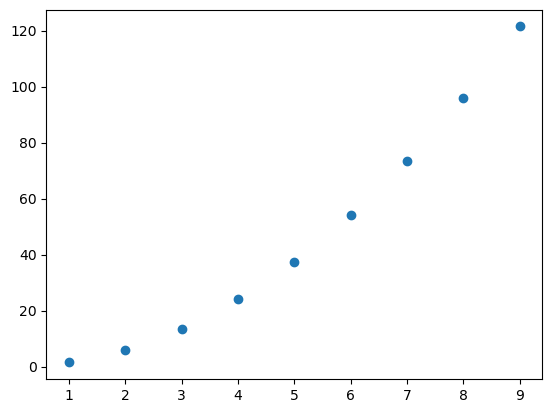

In [72]:
plt.scatter(ns, ds)

# Multivariable Calculus

In [54]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

## Vectors and Geometry

In [55]:
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

### Addition and multiplication

In [56]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

Dot product

In [57]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

Cross product

In [58]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

Norm

In [59]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

$\text{proj}_v(u) = \frac{u \cdot v}{|v|^2} v$

In [60]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

Lines: $\vec{r}(t) = \vec{r}_0 + t\vec{v}$

In [61]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Planes: $\vec{n} \cdot (P_0-\left<x,y,z\right>) = 0$

In [62]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0-r)

-x - y - z + 16

## Vector Calculus

### Vector Derivatives

In [63]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [64]:
smp.diff(r,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

**Example:** Find the angle between the velocity and acceleration as a function of time $\theta(t)$

In [65]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

Find theta at $t=6$

In [66]:
theta.subs(t,6).evalf()

0.251108015692338

### Vector Integrals

(Note: Will not add the +C)

In [67]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [68]:
smp.Integral(r,t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

Some cases integrals can't be solved analytically - > see Second Year in Calculus video

In [69]:
from scipy.integrate import quad_vec

In [70]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [71]:
r_f = smp.lambdify([t], r)

In [72]:
from scipy.integrate import quad_vec
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r_f = smp.lambdify([t], r)
quad_vec(r_f, 0, 1)[0]

array([[0.81549671],
       [0.84483859],
       [0.30229989]])

### Arclength

$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Rare Cases can be done symbolically. Find arclength of $\left< 0, t, t^2 \right>$ from $t=0$ to $t=1$

In [73]:
r = smp.Matrix([0, t, t**2])
r

Matrix([
[   0],
[   t],
[t**2]])

In [74]:
r = smp.Matrix([0, t, t**2])
smp.integrate(smp.diff(r,t).norm(), (t,0,1))

asinh(2)/4 + sqrt(5)/2

# Examples

The magnetic field at a point $\vec{r}$ of a current configuration is 

$$\vec{B}(\vec{r}) = \frac{\mu_0}{4\pi}\int_t \frac{I \frac{d\vec{\ell}}{dt} \times (\vec{r}-\vec{\ell})}{|\vec{r}-\vec{\ell}|^3} dt $$

where $\vec{r} = (x,y,z)$ and $\vec{l} = (f(t), g(t), h(t))$ is a 1D curve in space that gives the location of the wire.

**Part 1: Use Sympy to find the integrand as a single 3-vector**

In [75]:
x, y, z, t, I, mu0 = smp.symbols('x y z t I \mu_0', real=True)
f, g, h = smp.symbols('f g h', cls=smp.Function)
f=f(t)
g=g(t)
h=h(t)

Define $\vec{r}$, $\vec{\ell}$ and $\vec{d\ell/dt}$

In [76]:
r = smp.Matrix([x,y,z])
l = smp.Matrix([f,g,h])
dldt = smp.diff(l)

Define integrand

In [77]:
dBdt = I * dldt.cross(r-l) / (r-l).norm()**3

In [78]:
dBdt

Matrix([
[I*(-(y - g(t))*Derivative(h(t), t) + (z - h(t))*Derivative(g(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[ I*((x - f(t))*Derivative(h(t), t) - (z - h(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[I*(-(x - f(t))*Derivative(g(t), t) + (y - g(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)]])

**Part 2**: Find the magnetic field a distance $H$ above a ring of radius $R$ flowing clockwise

In [79]:
R, H = smp.symbols('R, H', real=True)

In [80]:
dBdt = dBdt.subs([(f, R*smp.cos(t)),
                  (g, R*smp.sin(t)),
                  (h, 0),
                  (x,0), (y,0), (z,H)]).doit()
dBdt.simplify()
dBdt

Matrix([
[H*I*R*cos(t)/(H**2 + R**2)**(3/2)],
[H*I*R*sin(t)/(H**2 + R**2)**(3/2)],
[      I*R**2/(H**2 + R**2)**(3/2)]])

Find magnetic field

In [81]:
mu0/(4*smp.pi) * smp.integrate(dBdt, [t,0,2*smp.pi])

Matrix([
[                                    0],
[                                    0],
[I*R**2*\mu_0/(2*(H**2 + R**2)**(3/2))]])

For more ccomplicated electrical wire configurations, see my video on solving for the magnetic field of an arbtriary wire (uses numerical integration)

## Partial/Directional Derivatives

In [82]:
x, y, z = smp.symbols('x y z')

### Basics

Partial Derivatives $\partial f / \partial x$ and $\partial f / \partial y$ of $f(x,y)=y^2\sin(x+y)$

In [83]:
f = y**2 * smp.sin(x+y)
smp.diff(f,x)

y**2*cos(x + y)

In [84]:
smp.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

Or more complicated things like $\frac{\partial^3 f}{\partial xy^2}$

In [85]:
smp.diff(f,y,y,x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

### The Chain Rule

In [86]:
t = smp.symbols('t')
x, y, z, w, v =smp.symbols('x, y, z w v', cls=smp.Function)

* Suppose $x$, $y$, and $z$ are functions of $t$ 
* $w$ is a function of $x$, $y$, and $z$. i.e $w=w(x,y,z)$

Find $dw/dt$

In [87]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

In [88]:
w

w(x(t), y(t), z(t))

Can keep things in a more functional form:

In [89]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Or put in specific functions:

In [90]:
w1 = x**2+smp.exp(y)*smp.sin(z)

In [91]:
smp.diff(w1,t)

2*x(t)*Derivative(x(t), t) + exp(y(t))*sin(z(t))*Derivative(y(t), t) + exp(y(t))*cos(z(t))*Derivative(z(t), t)

In [92]:
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

## Multiple Integrals

In rare cases these can be done symbolically:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xdzdydx$$

In [87]:
x, y, z = smp.symbols('x, y, z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8

## Lagrangian Mechanics

The (simplified) idea of Lagrangian mechanics is the that kinetic energy and potential energy of a system can be expressed in terms of generalized coordinates and velocity

$$T = T(q,\dot{q}) \hspace{20mm} V=V(q,\dot{q})$$

where $q$ could be xyz of a point particle, or some angle $\theta$ (pendulum), or whatever makes the problem easiest to solve. The defining $L=T-V$, the following equation gives the equations of motion $q(t)$

$$\frac{dL}{dq} - \frac{d}{dt}\frac{dL}{d\dot{q}} = 0 $$

for all the different $q$'s of the system. The equation above gives a second order differential equation for all the different $q(t)$s.

**Example**: Find the equations of motion (in the form of differential equations)

<p align="center">
  <img src="symp_tut_p1.PNG" alt="drawing" width="400" align="center"/>
</p>

Let $(x,y)$ be the position of the pendulum bob

In [94]:
t, R, g, m1, m2 = smp.symbols('t R g m_1 m_2')
z, theta = smp.symbols(r'z \theta', cls=smp.Function)
z = z(t)
theta = theta(t)

dzdt = smp.diff(z,t)
dthedt = smp.diff(theta,t)

Define location of pendulum

In [95]:
x = z + R*smp.sin(theta)
y = -R*smp.cos(theta)

In [96]:
y

-R*cos(\theta(t))

Kinetic and potential energies

In [97]:
T1 = smp.Rational(1,2) * m1 * smp.diff(z,t)**2
T2 = smp.Rational(1,2) * m2 * (smp.diff(x,t)**2 + smp.diff(y,t)**2)
T = T1 + T2
V1 = 0
V2 = m2*g*y
V = V1 + V2

Get Lagrangian

In [98]:
L = T-V

In [99]:
L

R*g*m_2*cos(\theta(t)) + m_1*Derivative(z(t), t)**2/2 + m_2*(R**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))**2)/2

Get Lagranges equations of motion

In [100]:
LE1 = smp.diff(L, z) - smp.diff(smp.diff(L,dzdt), t)
LE2 = smp.diff(L, theta) - smp.diff(smp.diff(L,dthedt), t)

In [101]:
LE1

-m_1*Derivative(z(t), (t, 2)) - m_2*(-2*R*sin(\theta(t))*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 2*Derivative(z(t), (t, 2)))/2

In [102]:
LE2

-R*g*m_2*sin(\theta(t)) + m_2*(2*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))*sin(\theta(t))*Derivative(\theta(t), t))/2 - m_2*(2*R**2*sin(\theta(t))**2*Derivative(\theta(t), (t, 2)) + 4*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))*sin(\theta(t))*Derivative(\theta(t), t) + 2*R*(-R*sin(\theta(t))*Derivative(\theta(t), t)**2 + R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + Derivative(z(t), (t, 2)))*cos(\theta(t)))/2

We want a system of two second order differential equations that we can solve

In [103]:
sols = smp.solve([LE1, LE2], [smp.diff(z,t,t), smp.diff(theta,t,t)])

In [104]:
sols

{Derivative(\theta(t), (t, 2)): -R*m_2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_1*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_2*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2),
 Derivative(z(t), (t, 2)): R*m_2*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + R*m_2*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + g*m_2*sin(\theta(t))*cos(\theta(t))/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2)}

Find $d^2 \theta / dt^2 = $

In [105]:
sols[smp.diff(theta,t,t)]

-R*m_2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_1*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_2*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2)

Find $d^2 z / dt^2 = $

In [106]:
sols[smp.diff(z,t,t)]

R*m_2*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + R*m_2*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + g*m_2*sin(\theta(t))*cos(\theta(t))/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2)

With these two second order differential equations, the system can be numerically solved! (See any of my videos on Lagrangian mechanics)